## Усков Константин Александрович
### БАСО-03-20
# **Дисциплина «Информационные технологии»**
# **Рабочая тетрадь №6**
---
## **Теоретический материал – Эволюционные методы**
---
Деревья решений являются одним из наиболее эффективных

Эволюционные методы

Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта. Генетические алгоритмы Для применения ГА необходимо:

1. выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметров $X=(x_1,x_2,…,x_n)$ среди $x_i$ могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;

2. сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;

3. представить вектор X в форме хромосомы — записи следующего вида:

![](https://i.ibb.co/jMDpCKw/image.png)

Этапы генетического алгоритма могут быть представлены в следующем виде:
```
for (k=0; k<G; k++)
    { for (j=0; j<N; j++)
        { Выбор родительской пары хромосом;
        Кроссовер;
        Мутации;
        Оценка функции полезности F потомков;
        Селекция;
        }
        Замена текущего поколения новым;
    }
```

---
## **1.1.1 Пример**
---
### **Задача:**

Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы $𝑏_1, 𝑐_1, 𝑏_2, 𝑐_2$, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:

![](https://i.ibb.co/4Ymtrpj/image.png)

Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.

---
Потребуется несколько функций для реализации алгоритма. Напишем их.

---
### **Решение:**
Начнем с функции оценки качества хромосомы qZ(x,y):

In [ ]:
# функция качества хромосомы
def qZ(x, y):
    return (x - 3*y + 1)/(3*x**2 + 3*y**2 + 1)

Далее, оценим суммарное качество хромосом:

In [ ]:
# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

И запрограммируем представленную выше схему обмена хромосомами:

In [ ]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

Отсортируем массив качества наших потомков и выделим полученные индексы:

In [ ]:
def sotring(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

Напишем функцию для шага эволюции:

In [ ]:
# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

Произведем эволюционные изменения, в соответствии с задачей - 4 шага:

In [ ]:
# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sotring(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма (оценки качества хромосом, сортировки потомков и эволюционных шагов), решим задачу в числах. Пусть даны следующие массивы хромосом X и Y:

![]()

Запишем их в требуемом виде и воспользуемся написанной функцией evoSteps.

In [ ]:
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# реализация алгоритма
results = evoSteps(X, Y)

Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. Для этого, воспользуемся циклом по значениям переменной results.

In [ ]:
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


---
### **Задание:**
---
Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.

![](https://i.ibb.co/txp30GJ/image.png)

### **Решение:**

In [5]:
# алгоритм приведённый ранее является правильным, однако он
# избыточен для поставленной задачи, приведу свой вариант
class Popul:
    def __init__(self, gen):
        self.gen = gen
        self.funZ()
    def funZ(self):
        for i in range(4):
            self.gen[i].append((self.gen[i][0]-3*self.gen[i][1]-3)/(self.gen[i][0]**2+2*self.gen[i][1]**2+1))
    def sortByFunZ(self):
        for i in range(4):
            for j in range(4):
                if self.gen[j][2] < self.gen[i][2]:
                    tmp = self.gen[j]
                    self.gen[j] = self.gen[i]
                    self.gen[i] = tmp
    def makeNewPop(self):
        tmpGen = []
        tmpGen.append([self.gen[1][0], self.gen[0][1]])
        tmpGen.append([self.gen[2][0], self.gen[0][1]])
        tmpGen.append([self.gen[0][0], self.gen[1][1]])
        tmpGen.append([self.gen[0][0], self.gen[2][1]])
        self.gen = tmpGen
    def stepsEvol(self, count):
        print("На", 1, "шаге эволюции, максимальный показатель качества хромосомы:", self.giveMaxZ())
        print("    Параметры популяции: ", self.gen)
        for i in range(count - 1):
            self.makeNewPop()
            self.funZ()
            print("На", i+2, "шаге эволюции, максимальный показатель качества хромосомы:", self.giveMaxZ())
            print("    Параметры популяции: ", self.gen)
    def giveMaxZ(self):
        self.sortByFunZ()
        return self.gen[0][2]
    def giveSumZ(self):
        sum = 0
        for i in range(4):
            sum += self.gen[i][2]
        return sum
myPop = Popul([[-5, -1], [-3, -2], [-2, 0], [-1, 1]])
myPop.stepsEvol(4)
print("Максимальный показатель качества хромосомы среди всех шагов эволюции т.е. в популяции за всё время, будет на последнем шаге")
print("Общее качество популяции после 4 шагов этапов эволюции:", myPop.giveSumZ())

На 1 шаге эволюции, максимальный показатель качества хромосомы: 0.0
    Параметры популяции:  [[-3, -2, 0.0], [-5, -1, -0.17857142857142858], [-2, 0, -1.0], [-1, 1, -1.75]]
На 2 шаге эволюции, максимальный показатель качества хромосомы: 0.07692307692307693
    Параметры популяции:  [[-2, -2, 0.07692307692307693], [-5, -2, -0.058823529411764705], [-3, -1, -0.25], [-3, 0, -0.6]]
На 3 шаге эволюции, максимальный показатель качества хромосомы: 0.07692307692307693
    Параметры популяции:  [[-2, -2, 0.07692307692307693], [-3, -2, 0.0], [-5, -2, -0.058823529411764705], [-2, -1, -0.2857142857142857]]
На 4 шаге эволюции, максимальный показатель качества хромосомы: 0.07692307692307693
    Параметры популяции:  [[-2, -2, 0.07692307692307693], [-2, -2, 0.07692307692307693], [-3, -2, 0.0], [-5, -2, -0.058823529411764705]]
Максимальный показатель качества хромосомы среди всех шагов эволюции т.е. в популяции за всё время, будет на последнем шаге
Общее качество популяции после 4 шагов этапов эволюции

---
## **1.2. Теоретический материал – Метод имитации отжига**
---
Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления.

Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения.

Алгоритм имитации отжига включает следующие этапы:

![](https://i.ibb.co/Rc67hqG/image.png)

Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:

1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.

Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.

Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига Для этого, представим формальную постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.

Итак, необходимо Найти длину гамильтонова цикла $𝑆_4$ в полном графе $𝐾_6$ после четырех циклов решения задачи методом отжига. Даны расстояния $𝐿_{𝑖,𝑗}$ между вершинами. Даны также: начальная последовательность вершин $𝐿_0$, последовательность замен вершин 𝑍 и выпавшие при этом вероятности перехода $𝑃_𝑘,𝑘=1,...,4$.

Переход на худшее $(Δ𝑆_𝑘=𝑆_𝑘−𝑆_{𝑘−1}>0)$ решение допустим, если $𝑃∗=100\cdot \exp (-Δ𝑆/T_{k})$, где снижение температуры происходит по закону $𝑇_{𝑘+1}=0.5𝑇_𝑘$ от $𝑇_1=100$.

---
## **1.2.1 Пример**
---
### **Задача:**
Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:

![](https://i.ibb.co/DG6tJds/image.png)

### **Решение:**
---
Рассмотрим решение с применением Python.

---
Импортируем библиотеки:

---

In [ ]:
import networkx as nx
from math import e

Далее, опишем массив длин ребер, последовательности прохождение вершин на маршруте и их замены, значения P, а также начальную температуру:

In [ ]:
distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)] # длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случаные числа, выпавшие в процессе счёта

T = 100 # начальная температура

Запишем функции вероятности и изменения температуры:

In [ ]:
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta/T) # МОЖНО БЫЛО И В ТЕОРИИ НАПИСАТЬ ЭТУ ФУНКЦИЮ...

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

Построим граф по заданным вершинам, как в начальном условии:

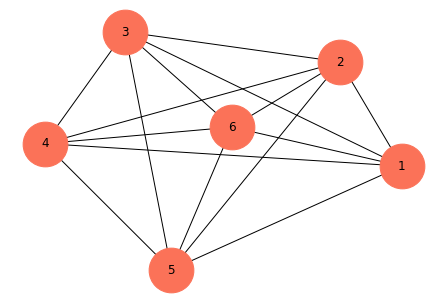

In [ ]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Теперь, напишем необходимые, согласно алгоритму выше, функции для работы метода имитации отжига. Вычислим длину ребра:

In [ ]:
# вычисление длины ребра
def edgeLength(i , j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

Вычислим длину маршрута:

In [ ]:
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V)-1):
        edges.append(edgeLength(V[i], V[i+1], distances))

    return sum(edges)

Запишем функцию для однократной перестановки в пути:

In [ ]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementName = True):
    decrement = 1 if replacementName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

А теперь функцию, для реализации непосредственно самой перестановки:

In [ ]:
# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

Теперь, опишем алгоритм выбора подходящего пути методом отжига:

In [ ]:
from types import new_class
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры

    return V, arrSum

И нарисуем наш граф, отвечающий заданному маршруту:

In [ ]:
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
# отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

И, наконец, рассчитаем наилучший маршрут и его длину:

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


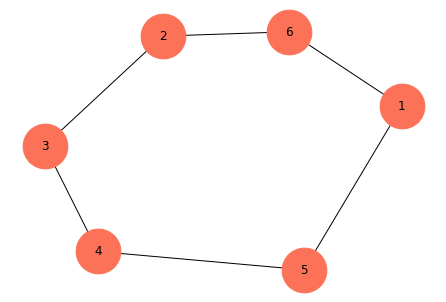

In [ ]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

---
### **Задание:**
---
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

![](https://i.ibb.co/z2jb0JF/image.png)
### **Решение:**
Для начала, в основном для интереса и оценке эффективности алгоритма, найдём гамильтонов цикл наименьшей длины:

In [ ]:
vesa = ((0, 19, 39, 35, 26, 18),
        (19, 0, 26, 33, 37, 14),
        (39, 26, 0, 22, 41, 21),
        (35, 33, 22, 0, 22, 19),
        (26, 37, 41, 22, 0, 24),
        (18, 14, 21, 19, 24, 0)) # элементы ij отвечает весу ребра (i+1, j+1)
ways = [] # Создадим массив всех возможных обходов
for i in range(2, 7):
    for j in range(2, 7):
        if j == i:
            continue
        for k in range(2, 7):
            if (k == i) or (k == j):
                continue
            for l in range(2, 7):
                if (l == i) or (l == j) or (l == k):
                    continue
                for m in range(2, 7):
                    if (m == i) or (m == j) or (m == k) or (m == l):
                        continue
                    ways.append([1, i, j, k, l, m, 1])
distance = []
for i in range(len(ways)):
    distance.append(0)
    for j in range(len(ways[i])-1):
        distance[i] += vesa[ways[i][j]-1][ways[i][j+1]-1]
print(min(distance))
for i in range(len(distance)):
    if distance[i] == min(distance):
        print(ways[i])
print(max(distance))
for i in range(len(distance)):
    if distance[i] == max(distance):
        print(ways[i])

124
[1, 2, 6, 3, 4, 5, 1]
[1, 5, 4, 3, 6, 2, 1]
189
[1, 3, 6, 5, 2, 4, 1]
[1, 4, 2, 5, 6, 3, 1]


А теперь используем метод имитации отжига. Одного я опять понять не могу, почему алгоритм приведённый в теории избыточен. Есть функция, которая не используется, некоторые параметры функции тоже не используются (подразумевают использование при другой задаче, но используются только одним способом)

Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута: 139
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


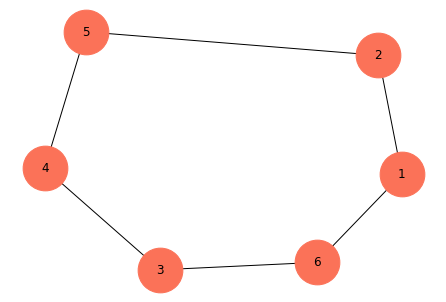

In [8]:
import networkx as nx
from math import e
distances = [(1, 2, 19),(1, 3, 39),(1, 4, 35),(1, 5, 26),
             (1, 6, 18),(2, 3, 26),(2, 4, 33),(2, 5, 37),
             (2, 6, 14),(3, 4, 22),(3, 5, 41),(3, 6, 21),
             (4, 5, 22),(4, 6, 19),(5, 6, 24)]
V = [1, 4, 2, 3, 5, 6, 1]
Z = [(5, 2),(4, 5),(2, 3),(3, 4)]
P = [88, 54, 24, 64]
T = 100
def probability(delta, T):
    return 100*e**(-delta/T)
def nextTemp(prevT):
    nextT = 0.5 * prevT
    return nextT
def edgeLength(i , j, distances):
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
def routeLength(V, distances):
    edges = []
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)
def routeOneReplacement(arrV, Z):
    arrV[Z[0] - 1], arrV[Z[1] - 1] = arrV[Z[1] - 1], arrV[Z[0] - 1]
    return arrV
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if P[i] < p:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = nextTemp(T)
    return V, arrSum
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances) 
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

---
## **Задание***
---
На решенном уже примере поэкспериментируйте с показателем S, проанализируйте результаты.
### **Решение:**
Показатель $S_i$ это длина гамильтонова цикла на i шаге метода отжига. Не очень понятно, в чём должен заключаться эксперимент...
Проверим, как поведёт себя алгоритм, если начальное решение будет наилучшим, т.е. будет ли переход на худшее решение по вероятности

Лучший выбранный маршрут: [1, 6, 2, 4, 3, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [124, 164, 141, 154, 163]


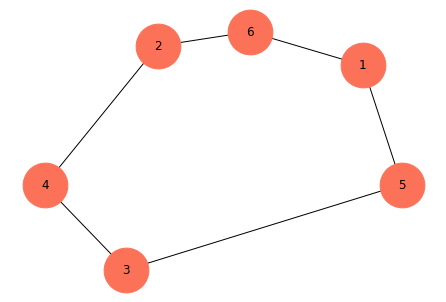

In [ ]:
V = [1, 2, 6, 3, 4, 5, 1]
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

Лучший выбранный маршрут: [1, 4, 5, 6, 3, 2, 1]
Длина лучшего выбранного маршрута: 147
Длины всех рассмотренных маршрутов: [124, 156, 133, 147, 164]


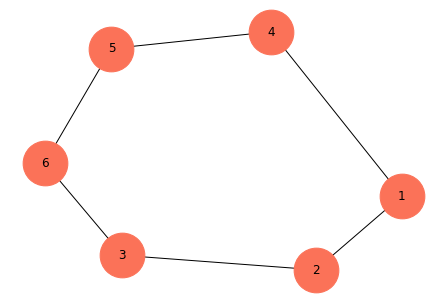

In [ ]:
V = [1, 5, 4, 3, 6, 2, 1]
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

А теперь посмотрим каков будет результат для наихудших решений:

Лучший выбранный маршрут: [1, 6, 3, 2, 5, 4, 1]
Длина лучшего выбранного маршрута: 159
Длины всех рассмотренных маршрутов: [189, 155, 152, 156, 159]


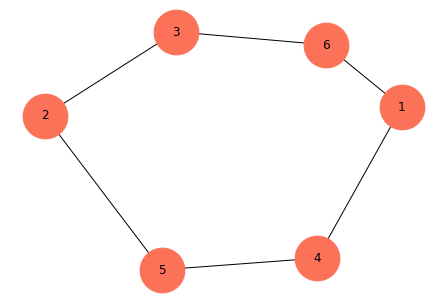

In [ ]:
V = [1, 3, 6, 5, 2, 4, 1]
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

Лучший выбранный маршрут: [1, 2, 6, 4, 5, 3, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [189, 152, 167, 154, 175]


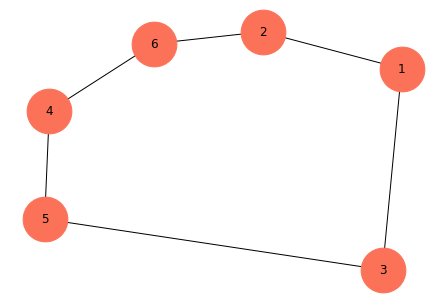

In [ ]:
V = [1, 4, 2, 5, 6, 3, 1]
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

Что ж, а теперь составлю свой алгоритм, который будет основан на классическом методе имитации отжига т.е. перестановка вершин будет действительно случайной и максимально разнообразной (будем так же переставлять начало и конец одновременно, ведь должен быть цикл). Алгоритм будет находить гамильтонов цикл минимального веса для полного графа.

Для удобства создам класс. Одна функция будет выполнять алгоритм при указанном числе шагов (максимум зависит от скорости понижения температуры). Вторая функция будет выполнять алгоритм для максимального числа шагов (выберу 250, ведь всего 120 способов), однако выводить данные она будет до того шага, как был найден последнее лучшее решение т.е. с одной стороны нам известно, что для моего варианта минимальный вес цикла равен 124, однако в результате случайности может быть выбрано худшее решение, поэтому останавливаться, как только длина будет 124 - неверно. Таким образом эта функция предназначена для оценки эффективности алгоритма. И последняя функция будет указанное число раз вызывать вторую функцию и выводить массив числа шагов.

Таким образом параметры P и Z использоваться не будут, так же не вижу смысла рисовать графы

In [30]:
import numpy
from numpy.random import randint, uniform
from numpy import exp
class GamCircle:
    def __init__(self, distances, startCircle, paramDecrease):
        self.distances = distances[:][:]
        self.startCircle = startCircle[:]
        self.decT = paramDecrease
        self.numV = len(startCircle)-1
    def decreaseT(self):
        self.T *= self.decT
    def calcP(self, delta):
        return exp(-delta/self.T)
    def changeCircle(self, circle):
        v1 = randint(self.numV) # брать последнюю вершину не будем
# т.к. она является первой и при замене первой, автоматически заменяется последняя
        v2 = randint(self.numV)
        while v1 == v2:
            v2 = randint(self.numV)
        if v1 == 0:
            circle[0], circle[self.numV], circle[v2] = circle[v2], circle[v2], circle[0]
        elif v2 == 0:
            circle[0], circle[self.numV], circle[v1] = circle[v1], circle[v1], circle[0]
        else:
            circle[v1], circle[v2] = circle[v2], circle[v1]
        return circle
    def vesCircle(self, circle):
        ves = 0
        for i in range(self.numV):
            for rebro in self.distances:
                if rebro[0] == circle[i] and rebro[1] == circle[i+1] or rebro[0] == circle[i+1] and rebro[1] == circle[i]:
                    ves += rebro[2]
                    break
        return ves
    def otdgigWithSteps(self, numSteps):
        circle = self.startCircle[:]
        ves = self.vesCircle(circle)
        vesa = [ves]
        self.T = 100
        for i in range(1, numSteps+1):
            if self.T == 0:
                break
            newCircle = self.changeCircle(circle[:])
            vesa.append(self.vesCircle(newCircle))
            delta = vesa[i] - ves
            if delta <= 0:
                ves = vesa[i]
                circle = newCircle
            else:
                if uniform(0, 1) < self.calcP(delta):
                    ves = vesa[i]
                    circle = newCircle
            self.decreaseT()
        return circle, vesa
    def otdgigWithMinSteps(self):
        circle = self.startCircle[:]
        ves = self.vesCircle(circle)
        vesa = [ves]
        self.T = 100
        bestStep = 0
        for i in range(1, 251):
            if self.T == 0:
                break
            newCircle = self.changeCircle(circle[:])
            vesa.append(self.vesCircle(newCircle))
            delta = vesa[i] - ves
            if delta < 0:
#придётся исключить == 0 т.к. иначе на 100+ шаге может опять найтись
#лучшее решение, а я хотел отлавливать лишь принятые худшие решения
                ves = vesa[i]
                circle = newCircle
                bestStep = i
            elif delta > 0:
                if uniform(0, 1) < self.calcP(delta):
                    ves = vesa[i]
                    circle = newCircle
                    bestStep = i
            self.decreaseT()
        return circle, vesa[:bestStep+1], bestStep
    def takeMedStep(self, vol):
        steps = []
        for i in range(vol):
            steps.append(self.otdgigWithMinSteps()[2])
        return steps

И так, проверим работу алгоритма для начального цикла из моего варианта

In [11]:
myCircle = GamCircle(distances, [1, 4, 2, 3, 5, 6, 1], 0.5)
bestCircle, vesa = myCircle.otdgigWithSteps(20)
print('Лучший выбранный маршрут:', bestCircle)
print('Длина лучшего выбранного маршрута:', myCircle.vesCircle(bestCircle))
print('Длины всех рассмотренных маршрутов:', vesa)

Лучший выбранный маршрут: [3, 6, 2, 1, 5, 4, 3]
Длина лучшего выбранного маршрута: 124
Длины всех рассмотренных маршрутов: [177, 156, 167, 167, 156, 152, 128, 152, 146, 152, 156, 124, 128, 155, 133, 164, 155, 139, 155, 133, 156]


Проверим алгоритм для двух худших решений, узнав сколько шагов потребуется

In [ ]:
worseCircle1 = GamCircle(distances, [1, 3, 6, 5, 2, 4, 1], 0.8)
bestCircle, vesa, bestStep = worseCircle1.otdgigWithMinSteps()
print('Потребовалось', bestStep, 'шагов')
print('Лучший выбранный маршрут:', bestCircle)
print('Длина лучшего выбранного маршрута:', worseCircle1.vesCircle(bestCircle))
print('Длины всех рассмотренных маршрутов:', vesa)

Потребовалось 40 шагов
Лучший выбранный маршрут: [3, 4, 5, 1, 2, 6, 3]
Длина лучшего выбранного маршрута: 124
Длины всех рассмотренных маршрутов: [189, 180, 160, 133, 155, 167, 157, 185, 157, 148, 128, 146, 147, 147, 131, 162, 162, 157, 139, 147, 162, 154, 128, 146, 154, 148, 146, 148, 152, 147, 146, 165, 152, 157, 152, 146, 147, 152, 131, 165, 124]


In [35]:
worseCircle2 = GamCircle(distances, [1, 4, 2, 5, 6, 3, 1], 0.3)
bestCircle, vesa, bestStep = worseCircle2.otdgigWithMinSteps()
print('Потребовалось', bestStep, 'шагов')
print('Лучший выбранный маршрут:', bestCircle)
print('Длина лучшего выбранного маршрута:', worseCircle2.vesCircle(bestCircle))
print('Длины всех рассмотренных маршрутов:', vesa)

Потребовалось 7 шагов
Лучший выбранный маршрут: [3, 4, 5, 1, 2, 6, 3]
Длина лучшего выбранного маршрута: 124
Длины всех рассмотренных маршрутов: [189, 185, 157, 155, 157, 167, 160, 124]


Теперь найдём среднее число шагов для худнешо решения, но при разной степени понижения температуры

In [ ]:
print('В среднем при коэффициенте понижении температуры:')
for i in range(5, 100, 5):
    worseCircle3 = GamCircle(distances, [1, 3, 6, 5, 2, 4, 1], i/100)
    steps = worseCircle3.takeMedStep(5000)
    print(i/100, 'уходит', sum(steps)/5000, 'шагов на решение задачи от ', min(steps), 'до', max(steps))

В среднем при коэффициенте понижении температуры:
0.05 уходит 24.8028 шагов на решение задачи от  3 до 160
0.1 уходит 24.615 шагов на решение задачи от  3 до 144
0.15 уходит 25.1566 шагов на решение задачи от  3 до 165
0.2 уходит 24.6784 шагов на решение задачи от  3 до 162
0.25 уходит 25.4144 шагов на решение задачи от  3 до 150
0.3 уходит 24.8956 шагов на решение задачи от  3 до 155
0.35 уходит 25.716 шагов на решение задачи от  3 до 166
0.4 уходит 25.6242 шагов на решение задачи от  3 до 162
0.45 уходит 26.4402 шагов на решение задачи от  3 до 156
0.5 уходит 26.4056 шагов на решение задачи от  3 до 148
0.55 уходит 26.5916 шагов на решение задачи от  3 до 158
0.6 уходит 27.4498 шагов на решение задачи от  3 до 157
0.65 уходит 28.0068 шагов на решение задачи от  3 до 185
0.7 уходит 29.3262 шагов на решение задачи от  3 до 155
0.75 уходит 31.1148 шагов на решение задачи от  3 до 166
0.8 уходит 33.9062 шагов на решение задачи от  3 до 156
0.85 уходит 38.21 шагов на решение задачи от  8 

Анализ результатов:

Для моего алгоритма в среднем достаточно 26 шагов метода имитации отжига, это очень хороший результат, ведь как было подсчитано ранее, всего 120 способов пройтись по графу. При правильном программировании случайного выбора решения, метод действительно является достаточно мощным.

Задание же по вариантам является частным случаем, не удачным аналогом, метода отжига, которое имеет смысл лишь для проверки результатов, поскольку случайности в нём нет (вероятности заданы, перестановка тоже не случайна) и ответ всегда будет одним и тем же. Это и делает алгоритм не успешным. Конечно для моего алгоритма 4 шагов не достаточно, но сравнивать алгоритмы по эффективности не правильно, ведь в реальности вероятности перехода и удачная перестановка неизвестны первоночально.

Теперь про понижение температуры. При резком понижении поиск лучшего решения отводиться на случайность при переборе. Если понижение слабое, то чаще будут приниматься неуспешные решения, что в теории приводит в увеличению шагов. Однако на практике можно заметить, что среднее число шагов не всегда растёт т.е. можно говорить, что принятие худших решений действительно даёт свой положительный результат.

К сожалению алгоритм плохо работает для больших графов, поскольку перебор очень большой (При числе вершин 10: (10-1)! = 362880 способов для полного графа). Если граф не полный, то можно переписать функцию, чтобы длина не существуещего веса равнялась большому числу, однако если гамильтоновов циклов будет очень мало, а сам граф большим, то результата не будет. Или составить алгоритм для случайного изменения решения на то, которое действительно существует (без рёбер большого веса), простой перестановкой тут не обойтись. Для ориентированного графа, нужно не много переписать алгоритм подсчёта расстояний, и правильно указывать расстояния.